# Time series analysis and data analysis for the final project
## In this effort, I am going to perform time series analysis for VEI pattern and number of deaths in the first step, and then, do some data analysis and select a target dataset based on our goals.

In [1]:
import pandas as pd
import numpy as np
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


## Loading Data

In [2]:
Data = pd.read_csv('sigvol-clean.csv')
print(Data.head())

   Year  Associated Tsunami?  Associated Earthquake?             Name  \
0 -4360                    0                       0  Macauley Island   
1 -4350                    0                       0            Kikai   
2 -4050                    0                       0           Masaya   
3 -4000                    0                       0             Pago   
4 -3580                    0                       0             Taal   

             Location           Country  Latitude  Longitude  Elevation  \
0         Kermadec Is       New Zealand   -30.200   -178.470        238   
1           Ryukyu Is             Japan    30.780    130.280        717   
2           Nicaragua         Nicaragua    11.984    -86.161        635   
3  New Britain-SW Pac  Papua New Guinea    -5.580    150.520        742   
4   Luzon-Philippines       Philippines    14.002    120.993        400   

            Type      Status  Volcano Explosivity Index (VEI)  DEATHS  
0        Caldera    Holocene          

## Let's see the change of number of deaths during the time

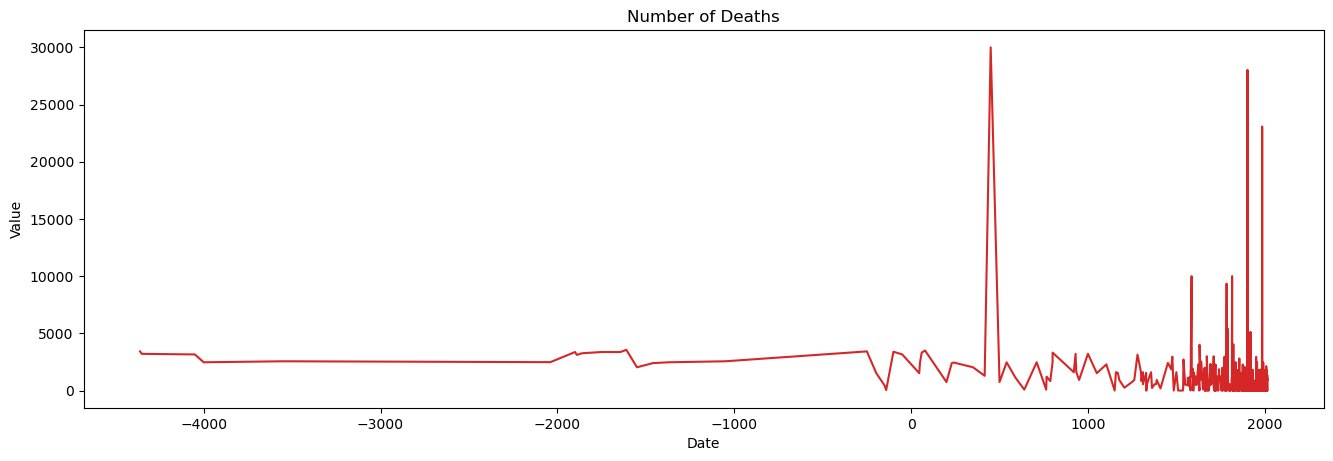

<Figure size 432x288 with 0 Axes>

In [4]:
def plot_df(Data, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    plt.savefig('Numberdeath.png')

plot_df(Data, x=Data.Year, y=Data.DEATHS, title='Number of Deaths')    


## And the change of VEI of deaths during the time

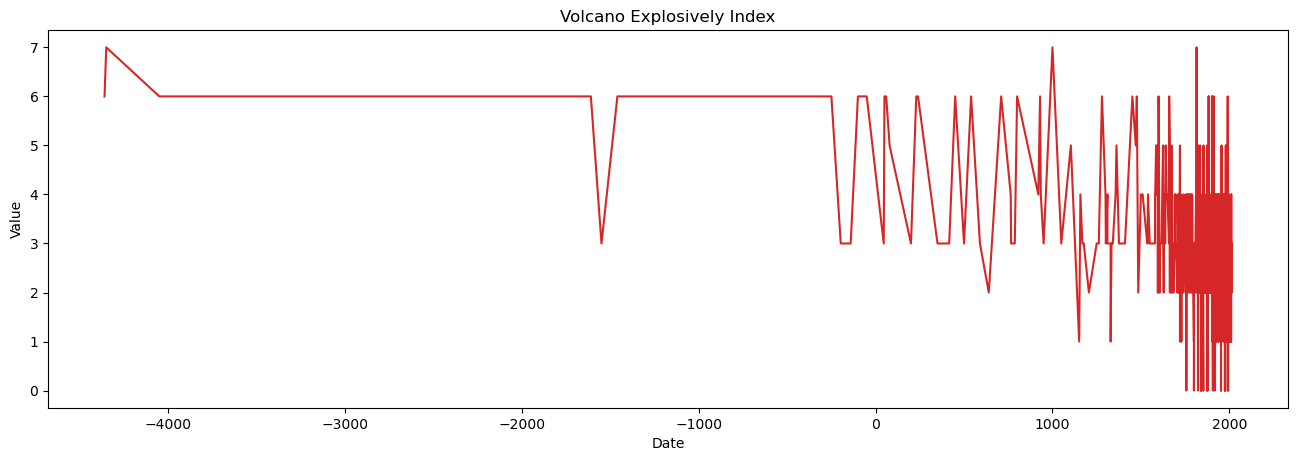

In [4]:
plot_df(Data, x=Data.Year, y=Data["Volcano Explosivity Index (VEI)"], title='Volcano Explosively Index')   

## As we can see, the trend for anchient data does not seem accurate. For achieving better and more accurate trend, we are going to plot the trend for the year after year of 1000

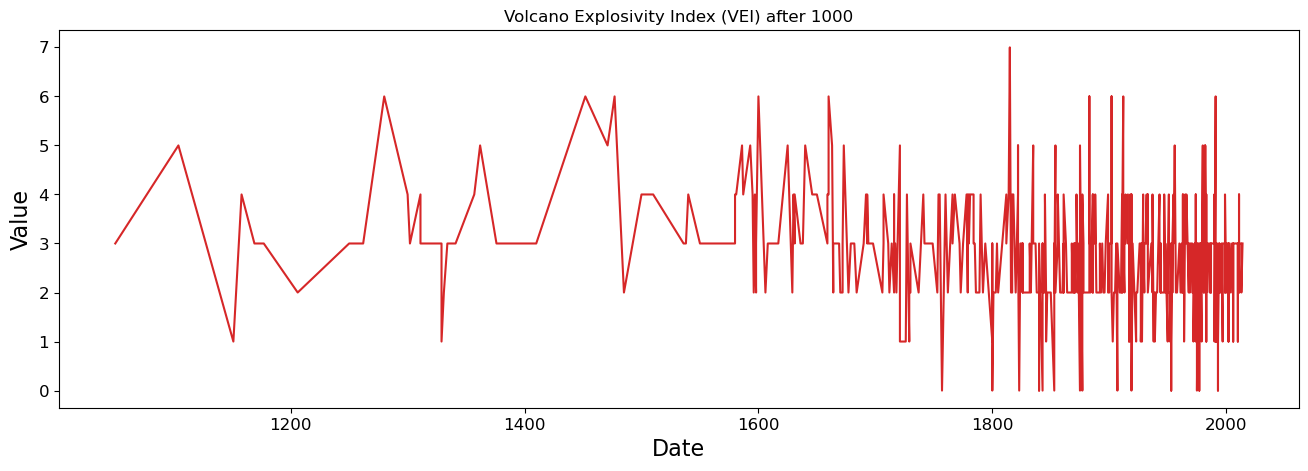

In [201]:
plot_df(Data[(Data['Year'] > 1000)], x=Data[(Data['Year'] > 1000)].Year, y=Data[(Data['Year'] > 1000)]["Volcano Explosivity Index (VEI)"], title='Volcano Explosivity Index (VEI) after 1000')  

In [216]:
New_Data = Data[(Data['Year'] > 1900)]

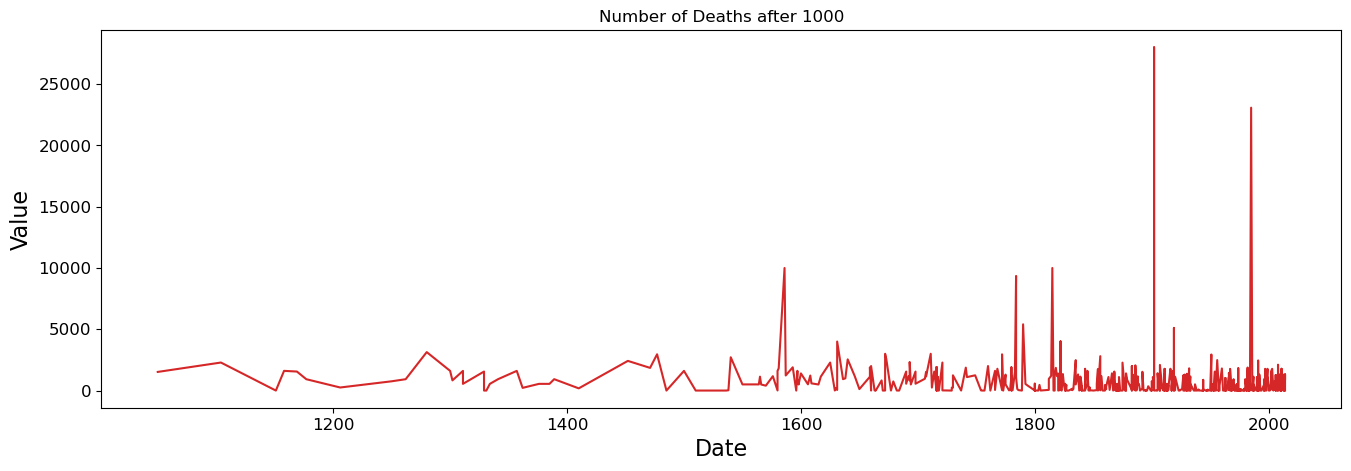

In [94]:
plot_df(Data[(Data['Year'] > 1000)], x=Data[(Data['Year'] > 1000)].Year, y=Data[(Data['Year'] > 1000)].DEATHS, title='Number of Deaths after 1000')  

## Now we want to see the linear coefficient between VEI and Latitude, Longitude and number of deaths

In [202]:
import statsmodels.api as sm

y = Data['Volcano Explosivity Index (VEI)']
x = Data[['Latitude', 'Longitude', 'DEATHS']]

# add constant
x = sm.add_constant(x)

my_model = sm.OLS(y,x, missing='drop')
result = my_model.fit()
print(result.summary())

                                   OLS Regression Results                                  
Dep. Variable:     Volcano Explosivity Index (VEI)   R-squared:                       0.161
Model:                                         OLS   Adj. R-squared:                  0.157
Method:                              Least Squares   F-statistic:                     41.83
Date:                             Tue, 29 Mar 2022   Prob (F-statistic):           9.72e-25
Time:                                     16:06:40   Log-Likelihood:                -1020.1
No. Observations:                              658   AIC:                             2048.
Df Residuals:                                  654   BIC:                             2066.
Df Model:                                        3                                         
Covariance Type:                         nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-

## Let's see the correlation between them

In [44]:
Data['Volcano Explosivity Index (VEI)'].corr(Data['DEATHS'])

0.39572561785538757

## The correlation between number of Deaths and VEI is 0.4 which can be assumed as a moderate correlation.

In [45]:
Data['Volcano Explosivity Index (VEI)'].corr(Data['Associated Tsunami?'])

-0.030592753032538125

In [46]:
Data['Volcano Explosivity Index (VEI)'].corr(Data['Associated Earthquake?'])

0.02800678718720123

In [97]:
Data['Volcano Explosivity Index (VEI)'].corr(Data['Latitude'])

0.0698083795108516

In [98]:
Data['Volcano Explosivity Index (VEI)'].corr(Data['Longitude'])


-0.1074187569891617

## Other correlations between VEI and other elements can not be considered as they are very low.

In [104]:
features1=list(['Volcano Explosivity Index (VEI)','Longitude', 'Latitude', 'DEATHS'])

Data[features1].corr()

,Volcano Explosivity Index (VEI),Longitude,Latitude,DEATHS
Volcano Explosivity Index (VEI),1.000000,-0.107419,0.069808,0.395726
Longitude,-0.107419,1.000000,-0.186688,-0.179435
Latitude,0.069808,-0.186688,1.000000,0.022446
DEATHS,0.395726,-0.179435,0.022446,1.000000


# We are going to start to perform time series analysis for VEI and number of death in two different ways
## Method one:

## For VEI

Text(0.5, 0.98, 'VEI')

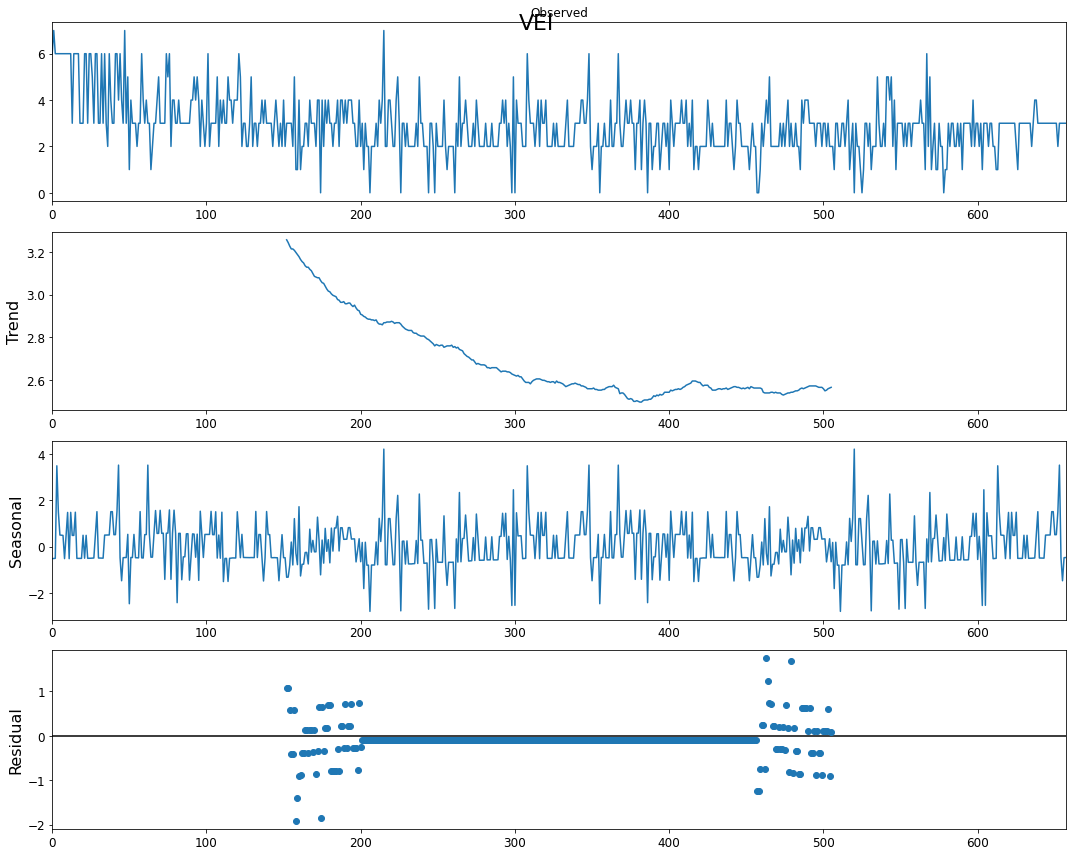

In [203]:
y = Data[['Year','Volcano Explosivity Index (VEI)']]
y = y.set_index('Year')
#Data['Volcano Explosivity Index (VEI)']
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 16
rcParams['ytick.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
#decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition = seasonal_decompose(y['Volcano Explosivity Index (VEI)'].values, period=305)
#decompose_result = seasonal_decompose(y, model='multiplicative', period=1)
decomp = decomposition.plot()
decomp.suptitle('VEI', fontsize=22)

## For number of death

Text(0.5, 0.98, 'Deaths')

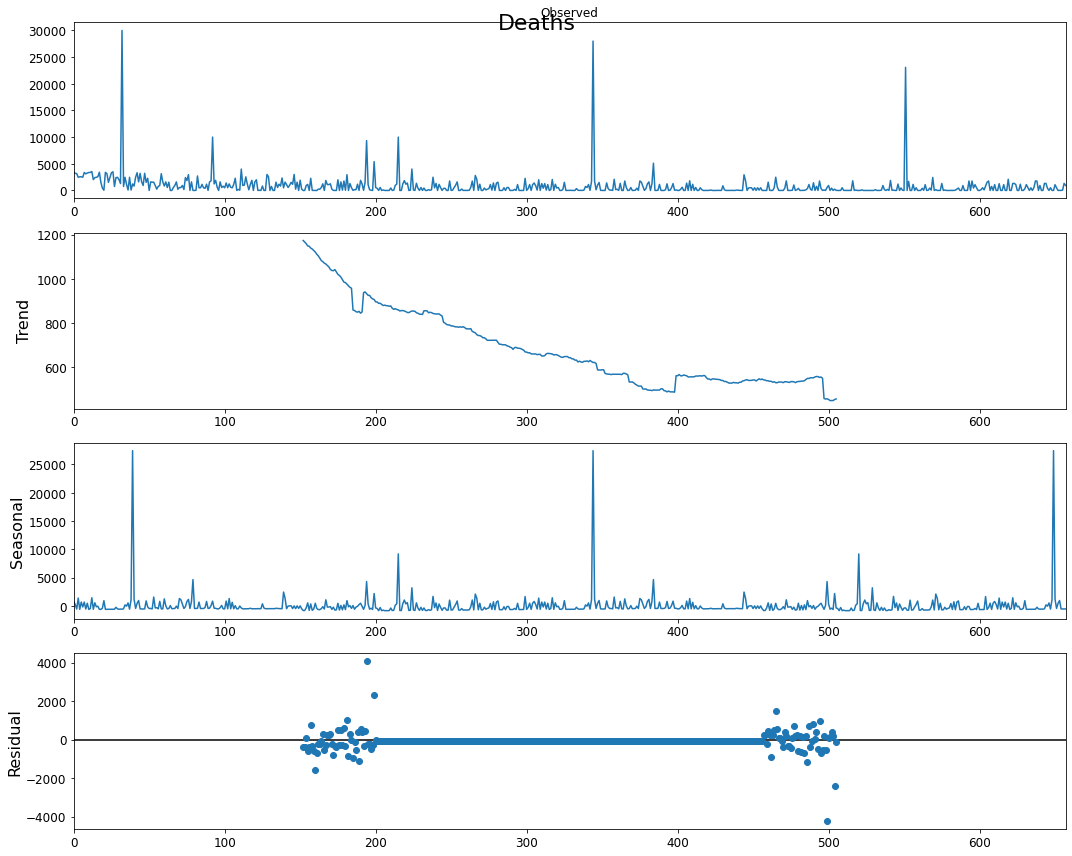

In [204]:
y = Data[['Year','DEATHS']]
y = y.set_index('Year')
#Data['Volcano Explosivity Index (VEI)']
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 15, 12
rcParams['axes.labelsize'] = 16
rcParams['ytick.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
#decomposition = sm.tsa.seasonal_decompose(y, model='additive')
decomposition = seasonal_decompose(y['DEATHS'].values, period=305)
#decompose_result = seasonal_decompose(y, model='multiplicative', period=1)
decomp = decomposition.plot()
decomp.suptitle('Deaths', fontsize=22)

## I did not like the method one as the trends were not very clear.
## Second method for time series analysis:
## For VEI

<ipython-input-9-1299946009bf>:29: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  results = seasonal_decompose(series, model='additive', freq=period)


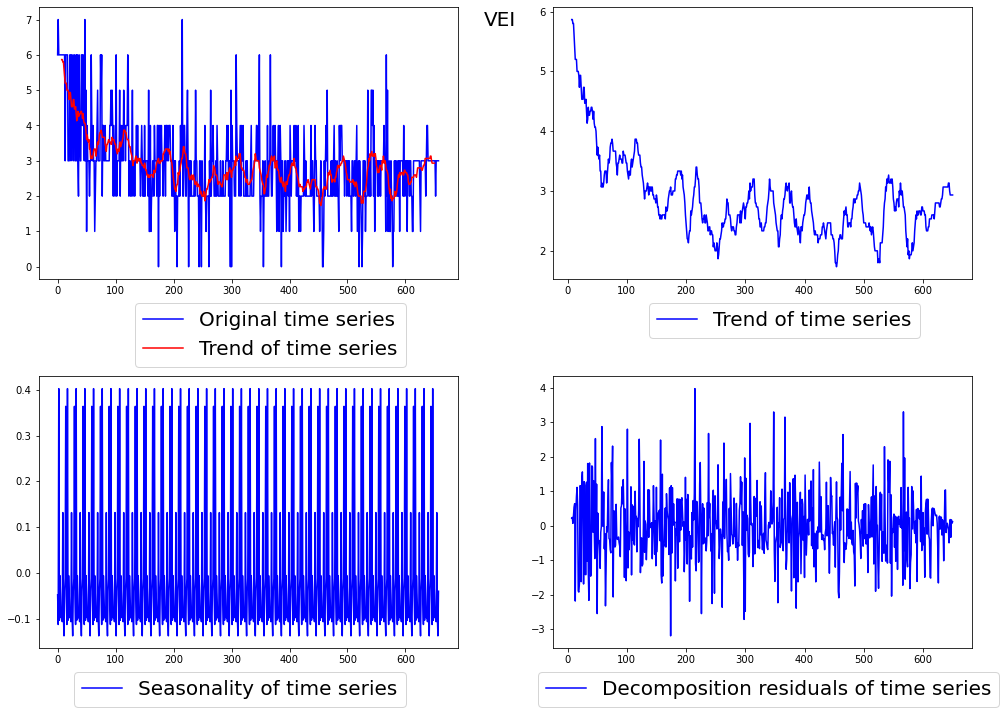

In [9]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
 
# Generate time-series data
total_duration = 650
step = 1
time = np.arange(0, total_duration, step)
 
# Period of the sinusoidal signal in seconds
T= 15
y = Data[['Year','Volcano Explosivity Index (VEI)']] 
# Period component
series_periodic = np.sin((2*np.pi/T)*time)
 
# Add a trend component
k0 = 2
k1 = 2
k2 = 0.05
k3 = 0.001
 
series_periodic = k0*series_periodic
series_trend    = k1*np.ones(len(time))+k2*time+k3*time**2
series          = y['Volcano Explosivity Index (VEI)'] 

# Set frequency using period in seasonal_decompose()
period = int(T/step)
results = seasonal_decompose(series, model='additive', freq=period)

trend_estimate    = results.trend
periodic_estimate = results.seasonal
residual          = results.resid
 
# Plot the time-series componentsplt.figure(figsize=(14,10))
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(series,label='Original time series', color='blue')
plt.plot(trend_estimate ,label='Trend of time series' , color='red')
plt.legend(loc='best',fontsize=20 , bbox_to_anchor=(0.90, -0.05))
plt.subplot(222)
plt.plot(trend_estimate,label='Trend of time series',color='blue')
plt.legend(loc='best',fontsize=20, bbox_to_anchor=(0.90, -0.05))
plt.subplot(223)
plt.plot(periodic_estimate,label='Seasonality of time series',color='blue')
plt.legend(loc='best',fontsize=20, bbox_to_anchor=(0.90, -0.05))
plt.subplot(224)
plt.plot(residual,label='Decomposition residuals of time series',color='blue')
plt.legend(loc='best',fontsize=20, bbox_to_anchor=(1.09, -0.05))
plt.tight_layout()
plt.suptitle('VEI', fontsize=20)
plt.savefig('decomposition.png')

## As we can see the trend is clear here (the red line). If we focous on the trend after the year of 2000 (after period of 600 on the x axis), we can see that the VEI has experienced an increasing trend. But if we want to cinsider the bigger picture and focuse on the VEI trend after the year of 1800  (after period of 350 on the x axis), the VEI showed a regular trend that had a sinusoidal trend.   

## Time series analysis for number of deaths

In [11]:
from sklearn import preprocessing
x_train = Data[['Year','DEATHS']]
x_train = preprocessing.normalize(x_train)
print(x_train)

df = pd.DataFrame(data=x_train)

[[-0.78638092  0.61774189]
 [-0.8046372   0.59376676]
 [-0.78859672  0.61491073]
 ...
 [ 0.99962732  0.02729866]
 [ 0.83617882  0.54845691]
 [ 0.90581511  0.4236732 ]]


<ipython-input-13-970a8c017ddb>:29: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  results = seasonal_decompose(series, model='additive', freq=period)


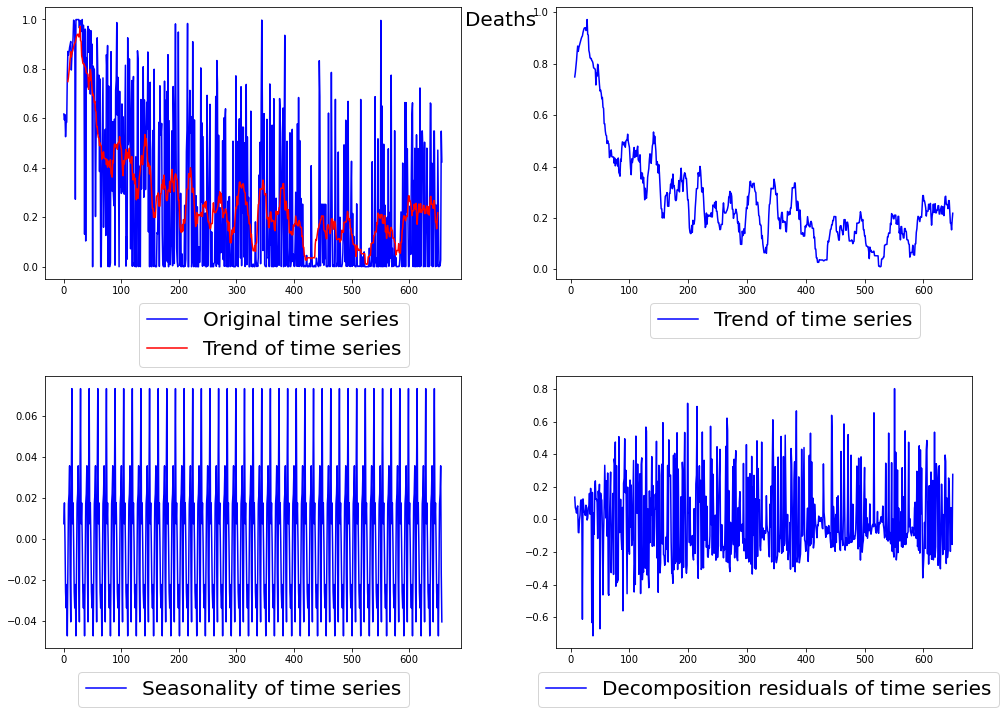

In [13]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
 
# Generate time-series data
total_duration = 1000
step = 1
time = np.arange(0, total_duration, step)
 
# Period of the sinusoidal signal in seconds
T= 15
y = df
# Period component
series_periodic = np.sin((2*np.pi/T)*time)
 
# Add a trend component
k0 = 2
k1 = 2
k2 = 0.05
k3 = 0.001
 
series_periodic = k0*series_periodic
series_trend    = k1*np.ones(len(time))+k2*time+k3*time**2
series          = df.iloc[:,[1]]

# Set frequency using period in seasonal_decompose()
period = int(T/step)
results = seasonal_decompose(series, model='additive', freq=period)

trend_estimate    = results.trend
periodic_estimate = results.seasonal
residual          = results.resid
 
# Plot the time-series componentsplt.figure(figsize=(14,10))
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(series,label='Original time series', color='blue')
plt.plot(trend_estimate ,label='Trend of time series' , color='red')
plt.legend(loc='best',fontsize=20 , bbox_to_anchor=(0.90, -0.05))
plt.subplot(222)
plt.plot(trend_estimate,label='Trend of time series',color='blue')
plt.legend(loc='best',fontsize=20, bbox_to_anchor=(0.90, -0.05))
plt.subplot(223)
plt.plot(periodic_estimate,label='Seasonality of time series',color='blue')
plt.legend(loc='best',fontsize=20, bbox_to_anchor=(0.90, -0.05))
plt.subplot(224)
plt.plot(residual,label='Decomposition residuals of time series',color='blue')
plt.legend(loc='best',fontsize=20, bbox_to_anchor=(1.09, -0.05))
plt.suptitle('Deaths', fontsize=20)
plt.tight_layout()
plt.savefig('decomposition2.png')

##  For perfomring time series analysis for number of deaths, we had to normalize number of deaths. If we focous on the trend after the year of 1970 (after period of 500 on the x axis), we can see that the number of death has experienced no sensible change just once and then backed to its normal. 

## Now we want to perform time series analysis just for observations after 1900

In [31]:
New_Data = Data[(Data['Year'] > 1990)]

## Time series analysis for VEI

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-33-21f0c07f3ccf>:25: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  results = seasonal_decompose(series, model='additive', freq=period)
<ipython-input-33-21f0c07f3ccf>:45: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


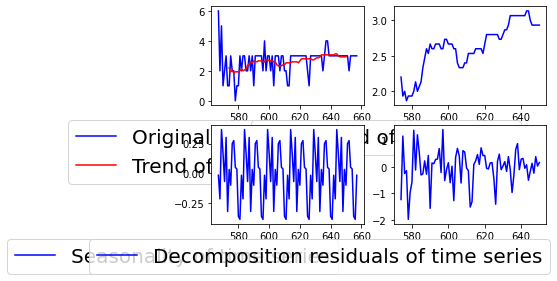

In [33]:
# Generate time-series data

total_duration = 100
step = 1
time = np.arange(0, total_duration, step)
 
# Period of the sinusoidal signal in seconds
T= 15
y = New_Data[['Year','Volcano Explosivity Index (VEI)']] 
# Period component
series_periodic = np.sin((2*np.pi/T)*time)
 
# Add a trend component
k0 = 2
k1 = 2
k2 = 0.05
k3 = 0.001
 
series_periodic = k0*series_periodic
series_trend    = k1*np.ones(len(time))+k2*time+k3*time**2
series          = y['Volcano Explosivity Index (VEI)'] 

# Set frequency using period in seasonal_decompose()
period = int(T/step)
results = seasonal_decompose(series, model='additive', freq=period)

trend_estimate    = results.trend
periodic_estimate = results.seasonal
residual          = results.resid
 
# Plot the time-series componentsplt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(series,label='Original time series', color='blue')
plt.plot(trend_estimate ,label='Trend of time series' , color='red')
plt.legend(loc='best',fontsize=20 , bbox_to_anchor=(0.90, -0.05))
plt.subplot(222)
plt.plot(trend_estimate,label='Trend of time series',color='blue')
plt.legend(loc='best',fontsize=20, bbox_to_anchor=(0.90, -0.05))
plt.subplot(223)
plt.plot(periodic_estimate,label='Seasonality of time series',color='blue')
plt.legend(loc='best',fontsize=20, bbox_to_anchor=(0.90, -0.05))
plt.subplot(224)
plt.plot(residual,label='Decomposition residuals of time series',color='blue')
plt.legend(loc='best',fontsize=20, bbox_to_anchor=(1.09, -0.05))
plt.tight_layout()
plt.savefig('decomposition3.png')

<ipython-input-34-f1bdf3cdec3e>:21: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  results = seasonal_decompose(series, model='additive', freq=period)


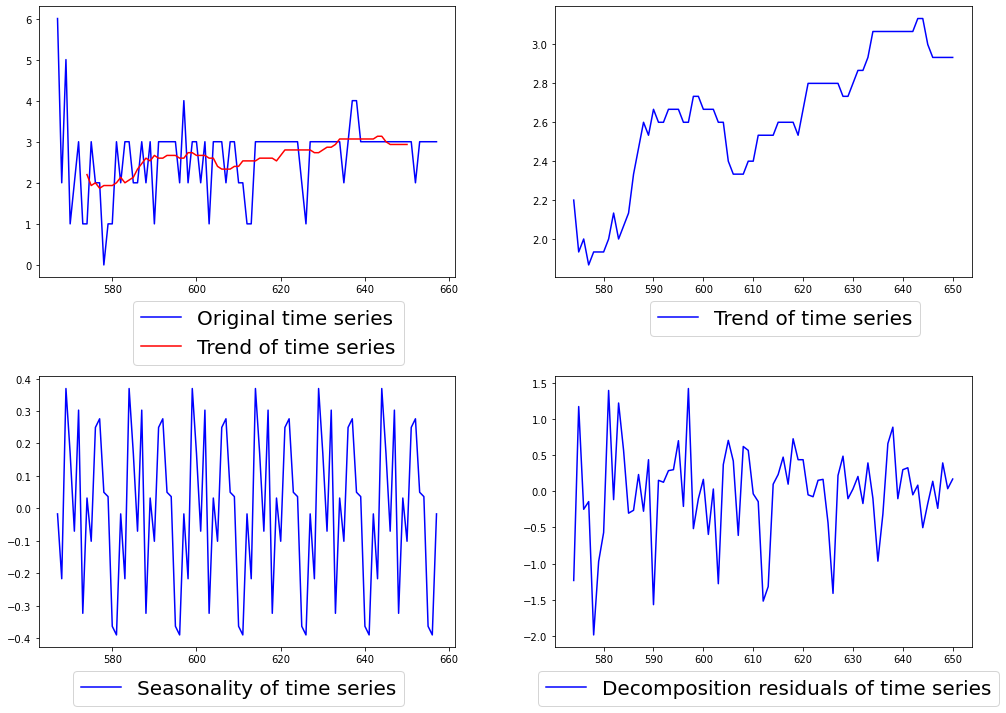

In [34]:
total_duration = 100
step = 1
time = np.arange(0, total_duration, step)
T= 15
y = New_Data[['Year','Volcano Explosivity Index (VEI)']] 
# Period component
series_periodic = np.sin((2*np.pi/T)*time)
 
# Add a trend component
k0 = 2
k1 = 2
k2 = 0.05
k3 = 0.001
 
series_periodic = k0*series_periodic
series_trend    = k1*np.ones(len(time))+k2*time+k3*time**2
series          = y['Volcano Explosivity Index (VEI)'] 

# Set frequency using period in seasonal_decompose()
period = int(T/step)
results = seasonal_decompose(series, model='additive', freq=period)

trend_estimate    = results.trend
periodic_estimate = results.seasonal
residual          = results.resid
 
# Plot the time-series componentsplt.figure(figsize=(14,10))
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(series,label='Original time series', color='blue')
plt.plot(trend_estimate ,label='Trend of time series' , color='red')
plt.legend(loc='best',fontsize=20 , bbox_to_anchor=(0.90, -0.05))
plt.subplot(222)
plt.plot(trend_estimate,label='Trend of time series',color='blue')
plt.legend(loc='best',fontsize=20, bbox_to_anchor=(0.90, -0.05))
plt.subplot(223)
plt.plot(periodic_estimate,label='Seasonality of time series',color='blue')
plt.legend(loc='best',fontsize=20, bbox_to_anchor=(0.90, -0.05))
plt.subplot(224)
plt.plot(residual,label='Decomposition residuals of time series',color='blue')
plt.legend(loc='best',fontsize=20, bbox_to_anchor=(1.09, -0.05))
plt.tight_layout()
plt.savefig('decomposition3.png')

## Since we changed our dataset and wanted to see the time series analysis for our dataset after the year of 1900, the x axis starts from 338 rows which contains year of 1900.

## For number of death

In [35]:
x_train = New_Data[['Year','DEATHS']]
x_train = preprocessing.normalize(x_train)
print(x_train)

df = pd.DataFrame(data=x_train)

[[9.75396843e-01 2.20456343e-01]
 [9.99434271e-01 3.36323939e-02]
 [6.32061517e-01 7.74918214e-01]
 [9.99999874e-01 5.02260107e-04]
 [9.97211437e-01 7.46280784e-02]
 [9.99999496e-01 1.00401556e-03]
 [9.99995464e-01 3.01203453e-03]
 [9.99995464e-01 3.01203453e-03]
 [8.35133288e-01 5.50047627e-01]
 [9.99989804e-01 4.51575928e-03]
 [9.99292678e-01 3.76050933e-02]
 [9.99999874e-01 5.01756083e-04]
 [9.99999874e-01 5.01756083e-04]
 [9.99999874e-01 5.01756083e-04]
 [9.99998868e-01 1.50451184e-03]
 [9.99999874e-01 5.01504450e-04]
 [9.99997988e-01 2.00601402e-03]
 [9.99547595e-01 3.00766578e-02]
 [9.91422128e-01 1.30698757e-01]
 [9.75094450e-01 2.21790020e-01]
 [9.99996862e-01 2.50500216e-03]
 [9.99999874e-01 5.01001941e-04]
 [9.07826220e-01 4.19346581e-01]
 [9.99998872e-01 1.50225168e-03]
 [9.99939324e-01 1.10158563e-02]
 [9.99999498e-01 1.00150175e-03]
 [7.47615831e-01 6.64131439e-01]
 [9.99999875e-01 5.00500438e-04]
 [7.47945801e-01 6.63759805e-01]
 [9.74955278e-01 2.22401004e-01]
 [8.790693

<ipython-input-37-3059e6e58f67>:24: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  results = seasonal_decompose(series, model='additive', freq=period)


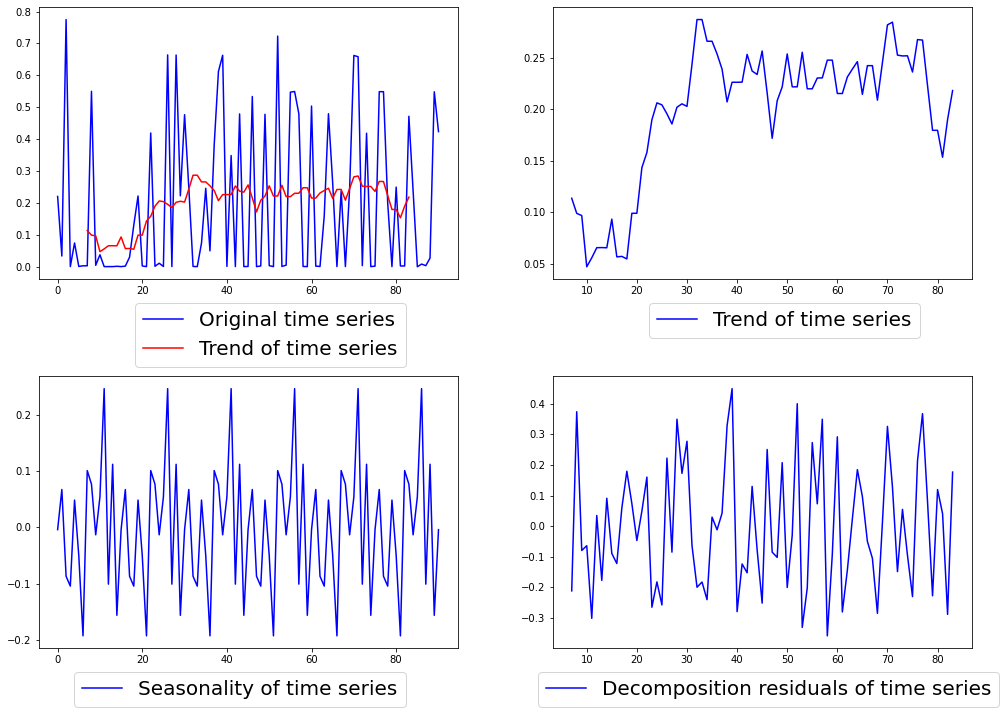

In [37]:
# Generate time-series data
total_duration = 100
step = 1
time = np.arange(0, total_duration, step)
 
# Period of the sinusoidal signal in seconds
T= 15
y = df
# Period component
series_periodic = np.sin((2*np.pi/T)*time)
 
# Add a trend component
k0 = 2
k1 = 2
k2 = 0.05
k3 = 0.001
 
series_periodic = k0*series_periodic
series_trend    = k1*np.ones(len(time))+k2*time+k3*time**2
series          = df.iloc[:,[1]]

# Set frequency using period in seasonal_decompose()
period = int(T/step)
results = seasonal_decompose(series, model='additive', freq=period)

trend_estimate    = results.trend
periodic_estimate = results.seasonal
residual          = results.resid
 
# Plot the time-series componentsplt.figure(figsize=(14,10))
plt.figure(figsize=(14,10))
plt.subplot(221)
plt.plot(series,label='Original time series', color='blue')
plt.plot(trend_estimate ,label='Trend of time series' , color='red')
plt.legend(loc='best',fontsize=20 , bbox_to_anchor=(0.90, -0.05))
plt.subplot(222)
plt.plot(trend_estimate,label='Trend of time series',color='blue')
plt.legend(loc='best',fontsize=20, bbox_to_anchor=(0.90, -0.05))
plt.subplot(223)
plt.plot(periodic_estimate,label='Seasonality of time series',color='blue')
plt.legend(loc='best',fontsize=20, bbox_to_anchor=(0.90, -0.05))
plt.subplot(224)
plt.plot(residual,label='Decomposition residuals of time series',color='blue')
plt.legend(loc='best',fontsize=20, bbox_to_anchor=(1.09, -0.05))
plt.tight_layout()
plt.savefig('decomposition2.png')

## Based on what we achieved in our time series analysis, I believe the trend of VEI has increased recent years and we can consider it as an element.

# Step two:
## Now let's explore our dataset more and target a goal for our final dataset.

In [143]:
print(Data['DEATHS'].max()) 
print(Data['DEATHS'].min()) 

30000
0


In [155]:
print(Data['DEATHS'].mean()) 

834.1063829787234


In [145]:
print(Data['Volcano Explosivity Index (VEI)'].max()) 
print(Data['Volcano Explosivity Index (VEI)'].min()) 

7
0


In [146]:
print(Data['Volcano Explosivity Index (VEI)'].mean()) 

2.9027355623100304


In [147]:
print(Data['Volcano Explosivity Index (VEI)'].median()) 

3.0


In [148]:
print(Data['Volcano Explosivity Index (VEI)'].mode()) 

0    3
dtype: int64


## Based on what I learned, I would like to set a target dataset which has observations:
## 1- The VEI is more than 2.9 (the mean of VEI column) as a positive factor for our renewable power planet and less than 7 since after 7 I believe volanos can be very distructive for our planets equipments.
## 2- The number of death less than 834 (the mean of number of death). As the number of death and VEI have a moderate correlation with each other, if we want to have a few number of death, we lose some important locations with good heating potential (if we assume VEI number for evaluating this factor)
## 3- I just serached among the observation after the year of 0
## 4- I just consider those locations without tsunami and earthquake since these two can be considered as destructive factors for our renewable energies power planet.

In [39]:
Target_Data = Data[(Data['DEATHS']<834) & (Data['Year']>0) & (Data['Associated Tsunami?']<=0)]

In [16]:
Target_Data

,Year,Associated Tsunami?,Associated Earthquake?,Name,Location,Country,Latitude,Longitude,Elevation,Type,Status,Volcano Explosivity Index (VEI),DEATHS
27,200,0,0,"Arhab, Harra of",Arabia-S,Yemen,15.630,44.080,3100,Volcanic field,Historical,3,744
33,500,0,0,"Arhab, Harra of",Arabia-S,Yemen,15.630,44.080,3100,Volcanic field,Historical,3,744
36,640,0,0,"Uwayrid, Harrat",Arabia-W,Saudi Arabia,27.080,37.250,1900,Volcanic field,Anthropology,2,85
38,764,0,0,Sakura-jima,Kyushu-Japan,Japan,31.580,130.670,1117,Stratovolcano,Historical,4,80
40,787,0,0,Vesuvius,Italy,Italy,40.821,14.426,1281,Complex volcano,Historical,3,830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,2013,0,0,Sakura-jima,Kyushu-Japan,Japan,31.580,130.670,1117,Stratovolcano,Historical,3,493
652,2013,0,0,Sinabung,Sumatra,Indonesia,3.170,98.392,2460,Stratovolcano,Holocene,2,0
653,2014,0,0,Sinabung,Sumatra,Indonesia,3.170,98.392,2460,Stratovolcano,Holocene,3,17
654,2014,0,0,Kelut,Java,Indonesia,-7.930,112.308,1731,Stratovolcano,Historical,3,7


## Now we sort our data based on each columns and see number of iteation for each elements

In [17]:
Country = Target_Data.groupby('Country').size()
Country


Country
Cameroon                          1
Cape Verde                        2
Chile                             9
China                             1
Colombia                          5
Comoros                           5
Congo, DRC                        3
Costa Rica                        4
Ecuador                           7
El Salvador                       1
Equatorial Guinea                 1
Eritrea                           2
Ethiopia                          4
Greece                            1
Guatemala                         8
Iceland                          20
Indonesia                       112
Italy                            26
Japan                            75
Mexico                            5
Montserrat                        2
New Zealand                       5
Nicaragua                         2
Pacific Ocean                     7
Papua New Guinea                 10
Philippines                      25
Portugal                          6
Reunion             

In [8]:
Target_Data['Country'].value_counts()

Italy            3
Indonesia        2
Philippines      1
El Salvador      1
Cameroon         1
Yemen            1
Ethiopia         1
Japan            1
United States    1
Portugal         1
Name: Country, dtype: int64

In [173]:
Target_Data['Location'].value_counts()

Java                    29
Italy                   14
Kyushu-Japan            13
Luzon-Philippines       13
Lesser Sunda Is          8
Hokkaido-Japan           8
Honshu-Japan             7
Ecuador                  6
Banda Sea                6
Izu Is-Japan             6
Guatemala                5
Sangihe Is-Indonesia     5
Africa-NE                5
Halmahera-Indonesia      5
Iceland-S                4
Costa Rica               4
New Britain-SW Pac       4
Mexico                   4
W Indies                 4
Chile-C                  3
Vanuatu-SW Pacific       3
Colombia                 3
Kamchatka                3
Sumatra                  2
Bougainville-SW Paci     2
Hawaiian Is              2
Azores                   2
Iceland-SE               2
Mindanao-Philippines     2
Arabia-S                 2
Africa-E                 2
Chile-S                  2
Ryukyu Is                2
Nicaragua                2
Sulawesi-Indonesia       2
Red Sea                  2
New Zealand              1
A

In [183]:
Target_Data['Latitude'].value_counts()

-7.930     10
 13.257    10
-7.542     10
 31.580     6
-4.525      5
           ..
 15.700     1
 13.330     1
 63.430     1
 35.900     1
 30.480     1
Name: Latitude, Length: 100, dtype: int64

In [181]:
Target_Data['Longitude'].value_counts()

 112.308    10
 123.685    10
 110.442    10
 130.670     6
 129.871     5
            ..
 41.742      1
-20.280      1
 98.470      1
-25.320      1
 129.125     1
Name: Longitude, Length: 100, dtype: int64

In [18]:
Target_Data['Country'].value_counts()[:10].sort_values(ascending=False)

Indonesia           112
Japan                75
Italy                26
Philippines          25
Iceland              20
Papua New Guinea     10
Chile                 9
United States         9
Guatemala             8
Russia                8
Name: Country, dtype: int64

In [10]:
Target_Data['Location'].value_counts()[:10].sort_values(ascending=False)

Italy                3
Lesser Sunda Is      2
Izu Is-Japan         1
Azores               1
Red Sea              1
Africa-W             1
Aleutian Is          1
Africa-NE            1
El Salvador          1
Luzon-Philippines    1
Name: Location, dtype: int64

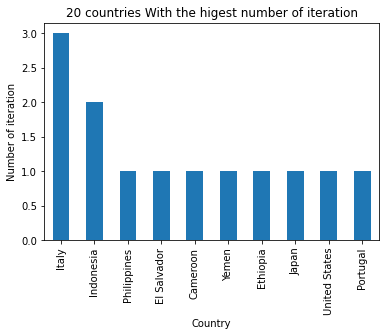

In [11]:
dff = Target_Data['Country'].value_counts()[:20]
dff.plot(kind = 'bar')
plt.ylabel('Number of iteration')
plt.xlabel('Country')
plt.title('20 countries With the higest number of iteration')
plt.show()

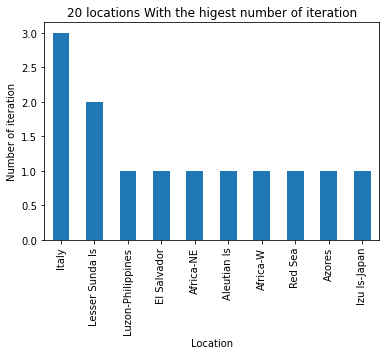

In [12]:
dfff = Target_Data['Location'].value_counts()[:20]
dfff.plot(kind = 'bar')
plt.ylabel('Number of iteration')
plt.xlabel('Location')
plt.title('20 locations With the higest number of iteration')
plt.show()

In [26]:
New_Data.to_csv('New_Data.csv', index=False)

In [41]:
Target_Data.to_csv('Target_Data.csv', index=False)